In [1]:
import sbibm
from sbivibm.plotting import pairplot_sns, plot_metrics, get_full_dataset, runtime_plot, plot_runtimes, plot_samples
from sbivibm.utils import query, get_tasks, delete_by_id, get_samples_by_id, get_posterior_by_id
from sbivibm.tasks import Pyloric
import pandas as pd

ModuleNotFoundError: No module named 'pyloric'

In [2]:
# Show only best
def filter_df(df):
    alpha = df[df["loss"].str.contains("0.1") * ~df["loss"].str.contains("(pathwise)")]
    mcmc = df[df["loss"].str.contains("na") * ~df["loss"].str.contains("(100 chains)")]
    alpha2 = df[df["loss"].str.contains("0.1") * ~df["loss"].str.contains("(unbiased)")* ~df["loss"].str.contains("(pathwise)")]
    alpha3 = df[df["loss"].str.contains("0.5") * df["loss"].str.contains("(unbiased)")* ~df["loss"].str.contains("(pathwise)")]
    alpha5 = df[df["loss"].str.contains("0.5") *~df["loss"].str.contains("(pathwise)")]
    iwelbo = df[df["loss"] == "iwelbo"]
    NLVI = df[df["num_rounds"]==1]
    df = df.drop(alpha.index.tolist() + iwelbo.index.tolist() + alpha5.index.tolist() + alpha2.index.tolist() + NLVI.index.tolist() + alpha3.index.tolist() + mcmc.index.tolist())
    return df

<Figure size 360x72 with 0 Axes>

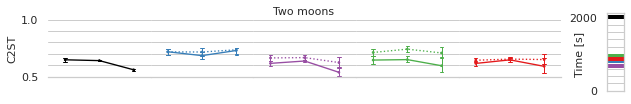

<Figure size 360x72 with 0 Axes>

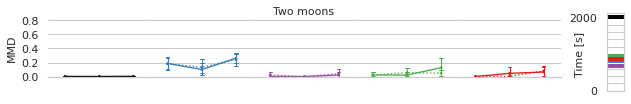

<Figure size 360x72 with 0 Axes>

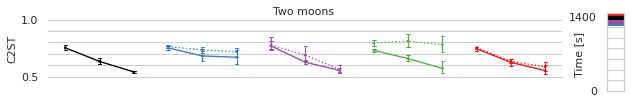

<Figure size 360x72 with 0 Axes>

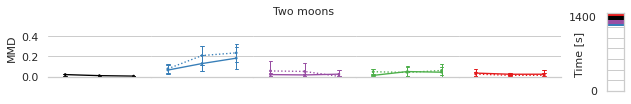

<Figure size 360x72 with 0 Axes>

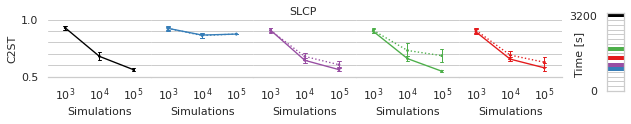

<Figure size 360x72 with 0 Axes>

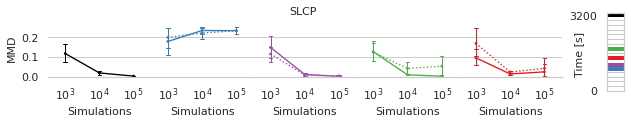

<Figure size 360x72 with 0 Axes>

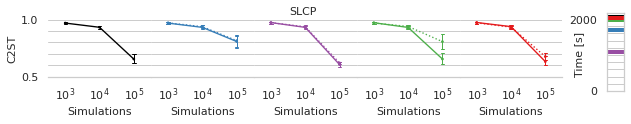

<Figure size 360x72 with 0 Axes>

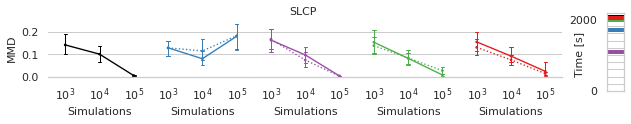

<Figure size 360x72 with 0 Axes>

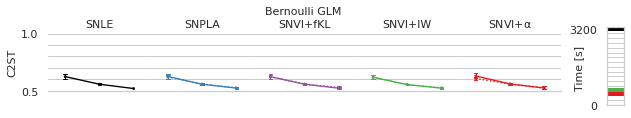

<Figure size 360x72 with 0 Axes>

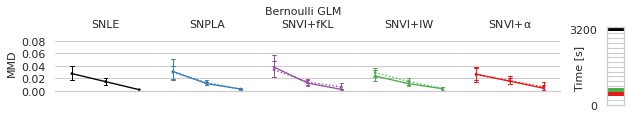

<Figure size 360x72 with 0 Axes>

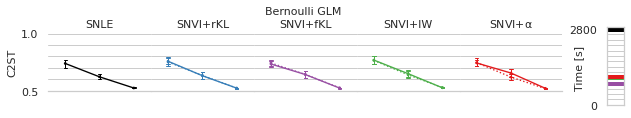

<Figure size 360x72 with 0 Axes>

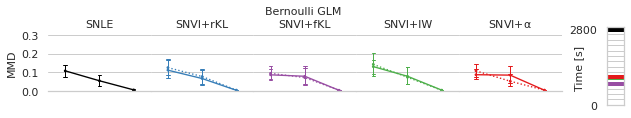

<Figure size 360x72 with 0 Axes>

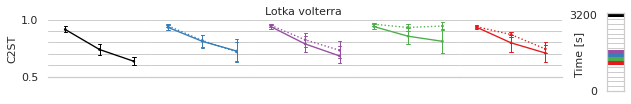

<Figure size 360x72 with 0 Axes>

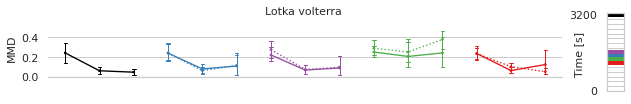

<Figure size 360x72 with 0 Axes>

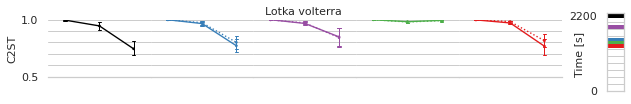

<Figure size 360x72 with 0 Axes>

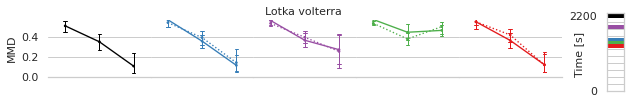

In [3]:
import seaborn as sns
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt


mpl.rc('font',family='DejaVu Sans')
sns.set(font="DejaVu Sans")

for task in ["two_moons", "slcp", "bernoulli_glm", "lotka_volterra"]:
    for method in ["L", "R"]:
        for metric in ["c2st", "mmd"]:
            df = get_full_dataset("main_benchmark")
            df_MCMC = df.query(f"task == '{task}'").query("loss == 'na'").query(f"algorithm == 'SN{method}MCMC'")
            df_MCMC = df_MCMC[df_MCMC["parameters"].str.contains("'num_chains': 100")]

            df_vi = df.query(f"task == '{task}'").query("loss == 'elbo'").query(f"algorithm == 'SN{method}VI'")
            df_vi = df_vi[df_vi["parameters"].str.contains("'sampling_method': 'ir'")]

            df_fKL = df.query(f"task == '{task}'").query("loss == 'forward_kl'").query(f"algorithm == 'SN{method}VI'")
            df_fKL = df_fKL[df_fKL["parameters"].str.contains("'sampling_method': 'ir'")]

            df_iw = df.query(f"task == '{task}'").query("loss == 'iwelbo'").query(f"algorithm == 'SN{method}VI'")
            df_iw = df_iw[df_iw["parameters"].str.contains("'sampling_method': 'ir'")*df_iw["parameters"].str.contains("'reduce_variance': True")]

            df_alpha = df.query(f"task == '{task}'").query("loss == 'renjey_divergence'").query(f"algorithm == 'SN{method}VI'")
            df_alpha = df_alpha[df_alpha["parameters"].str.contains("'sampling_method': 'ir'")*df_alpha["parameters"].str.contains("'alpha': 0.1")]

            m_MCMC = df_MCMC["time"].mean()
            m_vi = df_vi["time"].mean()
            m_fKL = df_fKL["time"].mean()
            m_iw = df_iw["time"].mean()
            m_alpha = df_alpha["time"].mean()

            fontsize=11
            fig = plt.figure(figsize=(5,1))
            fig = plot_metrics("main_benchmark", task,algorithm=f"N{method}", metrics=[f"{metric}"], groups=["rKL", "fKL", "IW", r"$\alpha$"], legend=False, legend_cols=4, legend_anchor=(0.0, -0.8), fontsize=fontsize, title_fontsize=fontsize, filter=filter_df, height=1.8, aspect=0.9)
            fig.axes[0,0].set_title("MCMC", fontsize=fontsize)
            if metric == "c2st":
                    fig.axes[0,0].set_ylabel(f"C2ST", fontsize=fontsize)
            else:
                    fig.axes[0,0].set_ylabel(f"MMD", fontsize=fontsize)
            
            if metric == "c2st":
                fig.axes[0,0].set_yticklabels([0.5,"", "","", "", 1.0], fontsize=fontsize)
            if True:
                fig.axes[0,0].set_title("SNLE", fontsize=fontsize)
                if method == "L":
                    fig.axes[0,1].set_title("SNPLA", fontsize=fontsize)
                else:
                    fig.axes[0,1].set_title("SNVI+rKL", fontsize=fontsize)
                fig.axes[0,2].set_title("SNVI+fKL", fontsize=fontsize)
                fig.axes[0,3].set_title("SNVI+IW", fontsize=fontsize)
                fig.axes[0,4].set_title(r"SNVI+$\alpha$", fontsize=fontsize)
#                 fig.axes[0,0].set_xlabel("", fontsize=fontsize)
#                 fig.axes[0,1].set_xlabel("", fontsize=fontsize)
#                 fig.axes[0,2].set_xlabel("", fontsize=fontsize)
#                 fig.axes[0,3].set_xlabel("", fontsize=fontsize)
#                 fig.axes[0,4].set_xlabel("", fontsize=fontsize)
            else:
                #fig.axes[0,0].set_yticklabels([0.5,"", "", "", "", 1.0], fontsize=fontsize)
                fig.axes[0,0].set_title("", fontsize=fontsize)
                fig.axes[0,1].set_title("", fontsize=fontsize)
                fig.axes[0,2].set_title("", fontsize=fontsize)
                fig.axes[0,3].set_title("", fontsize=fontsize)
                fig.axes[0,4].set_title(r"", fontsize=fontsize)
            if True:
                if task == "two_moons":
                    fig.fig.suptitle("Two moons", fontsize=fontsize,y=0.95, fontname="sans-serif", x=0.53)
                elif task == "bernoulli_glm":
                    fig.fig.suptitle("Bernoulli GLM", fontsize=fontsize,y=1.06, fontname="sans-serif", x=0.53)
                elif task == "slcp":
                    fig.fig.suptitle("SLCP", fontsize=fontsize,y=0.95, fontname="sans-serif", x=0.53)
                elif task == "lotka_volterra":
                    fig.fig.suptitle("Lotka volterra", fontsize=fontsize,y=0.95, fontname="sans-serif", x=0.53)   
            else:
                fig.fig.suptitle("", fontsize=fontsize)
            
            if task != "slcp":
                fig.axes[0,0].set_xlabel("")
                fig.axes[0,0].set_xticklabels([])
                fig.axes[0,1].set_xlabel("")
                fig.axes[0,1].set_xticklabels([])
                fig.axes[0,2].set_xlabel("")
                fig.axes[0,2].set_xticklabels([])
                fig.axes[0,3].set_xlabel("")
                fig.axes[0,3].set_xticklabels([])
                fig.axes[0,4].set_xlabel("")
                fig.axes[0,4].set_xticklabels([])
                
            if task != "bernoulli_glm":
                fig.axes[0,0].set_title("")
                fig.axes[0,1].set_title("")
                fig.axes[0,2].set_title("")
                fig.axes[0,3].set_title("")
                fig.axes[0,4].set_title("")
                #fig.fig.suptitle("")

            with sns.axes_style("whitegrid"):
                gs = fig.fig.add_gridspec(2, 7)
                ax = fig.fig.add_subplot(1,6,6)
                ax.set_position([1.05,0.3,0.03,0.6])
                ax.set_xlim(0,2)
                ax.set_ylim(0, m_MCMC + 100)
                ticks  =np.arange(0, m_MCMC + 100, 200)
                ax.set_yticks(ticks)
                ax.set_yticklabels(["0"] + [""]*len(ticks[1:-1]) + [str(int(ticks[-1]))])
                ax.set_xticks([])
                ax.set_ylabel("Time [s] ",  labelpad=-15, fontsize=fontsize)
                ax.eventplot(positions = np.array([m_MCMC, m_vi, m_fKL, m_iw, m_alpha]).reshape(-1,1), linewidths=4, lineoffsets=[1,1,1,1,1], colors=["black", "#377eb8", "#984ea3", "#4daf4a","#e41a1c"], linelengths=2, orientation='vertical')
                ax.tick_params(axis="y", labelsize=fontsize)
                fig.savefig(f"N{method}_{task}_{metric}_best.svg", transparent=True)

In [8]:
size = fig.fig.get_size_inches()
size

array([8.1, 1.8])

In [4]:
import svgutils.transform as sg
from svgutils.compose import *
import sys 

#create new SVG figure
fig = sg.SVGFigure("20.3cm", "7.8cm")

# load matpotlib-generated figures
fig1 = sg.fromfile('NL_bernoulli_glm_c2st_best.svg')
fig2 = sg.fromfile('NL_lotka_volterra_c2st_best.svg')
fig3 = sg.fromfile('NL_two_moons_c2st_best.svg')
fig4 = sg.fromfile('NL_slcp_c2st_best.svg')

# fig5 = sg.fromfile('NR_bernoulli_glm_c2st_best.svg')
# fig6 = sg.fromfile('NR_lotka_volterra_c2st_best.svg')
# fig7 = sg.fromfile('NR_two_moons_c2st_best.svg')
# fig8 = sg.fromfile('NR_slcp_c2st_best.svg')

# get the plot objects
plot1 = fig1.getroot()
plot1.moveto(0,0)
plot2 = fig2.getroot()
plot2.moveto(0,105)
plot3 = fig3.getroot()
plot3.moveto(0,195)
plot4 = fig4.getroot()
plot4.moveto(0,285)

# plot5 = fig5.getroot()
# plot5.moveto(0,130)
# plot6 = fig6.getroot()
# plot6.moveto(650,130)
# plot7 = fig7.getroot()
# plot7.moveto(0,390)
# plot8 = fig8.getroot()
# plot8.moveto(650,390)

# add text labels
txt1 = sg.TextElement(5,25, "A", size=18, weight="bold")
txt2 = sg.TextElement(5,120, "B", size=18, weight="bold")
txt3 = sg.TextElement(5,215, "C", size=18, weight="bold")
txt4 = sg.TextElement(5,310, "D", size=18, weight="bold")

# append plots and labels to figure
fig.append([plot1, plot2, plot3, plot4])
fig.append([txt1, txt2, txt3, txt4])

# save generated SVG files
fig.save("fig3_benchmark_metrics_no_legend_best.svg")

In [5]:
import svgutils.transform as sg
from svgutils.compose import *
import sys 

#create new SVG figure
fig = sg.SVGFigure("20.3cm", "7.8cm")

# load matpotlib-generated figures
fig1 = sg.fromfile('NR_bernoulli_glm_c2st_best.svg')
fig2 = sg.fromfile('NR_lotka_volterra_c2st_best.svg')
fig3 = sg.fromfile('NR_two_moons_c2st_best.svg')
fig4 = sg.fromfile('NR_slcp_c2st_best.svg')

# fig5 = sg.fromfile('NR_bernoulli_glm_c2st_best.svg')
# fig6 = sg.fromfile('NR_lotka_volterra_c2st_best.svg')
# fig7 = sg.fromfile('NR_two_moons_c2st_best.svg')
# fig8 = sg.fromfile('NR_slcp_c2st_best.svg')

# get the plot objects
plot1 = fig1.getroot()
plot1.moveto(0,0)
plot2 = fig2.getroot()
plot2.moveto(0,105)
plot3 = fig3.getroot()
plot3.moveto(0,195)
plot4 = fig4.getroot()
plot4.moveto(0,285)

# plot5 = fig5.getroot()
# plot5.moveto(0,130)
# plot6 = fig6.getroot()
# plot6.moveto(650,130)
# plot7 = fig7.getroot()
# plot7.moveto(0,390)
# plot8 = fig8.getroot()
# plot8.moveto(650,390)

# add text labels
txt1 = sg.TextElement(5,25, "A", size=18, weight="bold")
txt2 = sg.TextElement(5,120, "B", size=18, weight="bold")
txt3 = sg.TextElement(5,215, "C", size=18, weight="bold")
txt4 = sg.TextElement(5,310, "D", size=18, weight="bold")

# append plots and labels to figure
fig.append([plot1, plot2, plot3, plot4])
fig.append([txt1, txt2, txt3, txt4])


# save generated SVG files
fig.save("APPENDIX_benchmark_metrics_NR_no_legend.svg")

In [32]:
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
import matplotlib.pyplot as plt
COLORS =["black", "#377eb8", "#984ea3", "#4daf4a","#e41a1c"]
labels = ["MCMC (100 chain)", r"$\mathcal{L}_{rKL}$", r"$\mathcal{L}_{fKL}$", r"$\mathcal{L}_{IW}$ (STL)", r"$\mathcal{L}_{\alpha}$ (STL, $\alpha$=0.1)"]
line = mlines.Line2D([0,1],[0,1], color="black", label=r"SIR + $q_\phi$", linewidth=2)
line2 = mlines.Line2D([0,1],[0,1],linestyle=':', color="black", label=r"$q_\phi$", linewidth=2)
handles = [mpatches.Patch(color=COLORS[i], label=labels[i]) for i in range(len(labels))]
handles.append(line)
handles.append(line2)

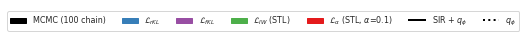

In [34]:
import seaborn as sns
sns.set_style("whitegrid")
fig = plt.figure(figsize=(8.1,0.1))
plt.axis("off")
plt.legend(handles=handles, ncol=7, fontsize=8)
plt.tight_layout()
plt.show()
fig.savefig("fig3_legend.svg")

In [2]:
def filter_df(df, task="two_moons"):
    rKL = df[(df["algorithm"]=="SNL")*(df["num_rounds"]==10)*(df["task"]==task)*(df["loss"]=="elbo")]
    fKL = df[(df["algorithm"]=="SNL")*(df["num_rounds"]==10)*(df["task"]==task)*(df["loss"]=="forward_kl")]

    MCMC100chain = df[(df["algorithm"]=="SNL")*(df["num_rounds"]==10)*(df["task"]==task)*(df["loss"]=="na (100 chains)")]
    
#     rKL = df[(df["task"]=="two_moons")*(df["loss"]=="forward_kl")]
#     MCMC = df[(df["task"]=="two_moons")*(df["loss"]=="na")]
#     SNL = df[~(df["algorithm"]=="SNL")]
#     #fKL = df[~(df["loss"]=="forward_kl")]
#     #iwelbo = df[df["loss"] == "iwelbo"]
#     NLVI = df[df["num_rounds"]==1]
#     df = df.drop(SNL.index.tolist() + NLVI.index.tolist)
    df = df.loc[rKL.index.tolist() + fKL.index.tolist() + MCMC100chain.index.tolist()]
    SIR = df[df["parameters"].str.contains("'sampling_method': 'ir'")]
    df = df.drop(SIR.index)
    return df

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = get_full_dataset("main_benchmark")
fKL_id = df.query("task=='two_moons'").query("algorithm=='SNLVI'").query("num_simulations==100000").query("num_observation==1").query("loss=='forward_kl'")["folder"].tolist()[-1]
rKL_id = df.query("task=='two_moons'").query("algorithm=='SNLVI'").query("num_simulations==100000").query("num_observation==1").query("loss=='elbo'")["folder"].tolist()[-1]
MCMC_ids = df.query("task=='two_moons'").query("algorithm=='SNLMCMC'").query("num_simulations==100000").query("num_observation==1").query("loss=='na'")["folder"].tolist()
fKL_samples = get_samples_by_id("main_benchmark", fKL_id)
rKL_samples = get_samples_by_id("main_benchmark", rKL_id)
MCMC_samples = get_samples_by_id("main_benchmark", MCMC_ids[-1])
MCMC_samples_multichain = get_samples_by_id("main_benchmark", MCMC_ids[0])

In [5]:
task = sbibm.get_task("two_moons")
reference = task.get_reference_posterior_samples(1)

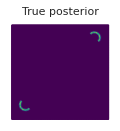

In [217]:
with sns.axes_style("white"):
    fig = plt.figure(figsize=(1.9,1.9))
    plt.title("True posterior", fontsize=11)
    plt.hexbin(reference[:,0], reference[:,1], extent=[0.78,-0.98,0.98,-0.78], gridsize=(150,150), cmap="viridis", rasterized=True)
    plt.axis("off")
    fig.savefig("reference_posterior.svg", transparent=True)

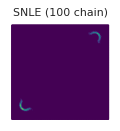

In [218]:
with sns.axes_style("white"):
    fig = plt.figure(figsize=(1.9,1.9))
    plt.title("SNLE (100 chain)", fontsize=11)
    plt.hexbin(MCMC_samples_multichain[:,0], MCMC_samples_multichain[:,1], extent=[0.78,-0.98,0.98,-0.78], cmap="viridis", gridsize=(150,150), rasterized=True)
    plt.axis("off")
    fig.savefig("MCMC_multichain_posterior.svg", transparent=True)

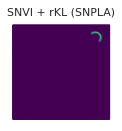

In [219]:
with sns.axes_style("white"):
    fig = plt.figure(figsize=(1.9,1.9))
    plt.title("SNVI + rKL (SNPLA)", fontsize=11)
    plt.hexbin(rKL_samples[:,0], rKL_samples[:,1], extent=[0.78,-0.98,0.98,-0.78], gridsize=(150,150), cmap="viridis", rasterized=True)
    plt.axis("off")
    fig.savefig("MCMC_rKL_posterior.svg", transparent=True)

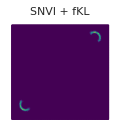

In [220]:
with sns.axes_style("white"):
    fig = plt.figure(figsize=(1.9,1.9))
    plt.title("SNVI + fKL", fontsize=11)
    plt.hexbin(fKL_samples[:,0], fKL_samples[:,1], extent=[0.78,-0.98,0.98,-0.78], gridsize=(150,150), cmap="viridis", rasterized=True)
    plt.axis("off")
    fig.savefig("MCMC_fKL_posterior.svg", transparent=True)

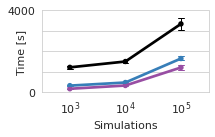

In [78]:
with sns.axes_style("white"):
    fig = plot_runtimes("main_benchmark",legend=False, legend_anchor=(-0.1, -0.6), filter=filter_df, fontsize=8, title_fontsize=8, quantile_cutoff=0.90, height=2.1, aspect=1.55)
    fig.axes[0,0].set_ylabel("Time [s]", fontsize=11, labelpad=-19)
    fig.axes[0,0].set_yticklabels([0,2000,4000], fontsize=11)
    fig.axes[0,0].set_xticklabels([r"$10^3$", r"$10^4$",r"$10^5$"], fontsize=11)
    fig.axes[0,0].set_ylim(0,4000)
    fig.axes[0,0].set_title("")
    fig.axes[0,0].set_yticklabels([0, "", "", "", 4000], fontsize=11)
    fig.axes[0,0].set_xlabel("Simulations", fontsize=11)
    sns.despine(fig.fig,fig.axes[0,0], left=False, right=False)
    fig.savefig("two_moons_runtime.svg", transparent=True)

In [79]:
import matplotlib.lines as mlines
import matplotlib.pyplot as plt

COLORS =["Black", "white","#377eb8","#984ea3"]
labels = ["SNLE", "", "SNVI+rKL","SNVI+fKL"]
handles = [mlines.Line2D([1],[1],color=COLORS[i], linewidth=3, label=labels[i]) for i in range(len(labels))]

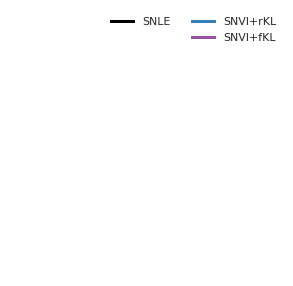

In [80]:
import seaborn as sns
with sns.axes_style("white"):
    fig = plt.figure(figsize=(5,5))
    plt.axis("off")
    plt.legend(handles=handles, ncol=2, fontsize=11, frameon=False)
    fig.savefig("fig2_legend.svg", transparent=True)

In [82]:
import svgutils.transform as sg
import sys 

#create new SVG figure
fig = sg.SVGFigure("25cm", "4")

# load matpotlib-generated figures
fig1 = sg.fromfile('reference_posterior.svg')
fig3 = sg.fromfile('MCMC_multichain_posterior.svg')
#fig2 = sg.fromfile('MCMC_singlechain_posterior.svg')
fig4 = sg.fromfile('MCMC_rKL_posterior.svg')
fig5 = sg.fromfile('MCMC_fKL_posterior.svg')

fig6 = sg.fromfile('two_moons_runtime.svg')
fig10 = sg.fromfile('fig2_legend.svg')

# get the plot objects
plot1 = fig1.getroot()
plot1.moveto(-10,20)
# plot2 = fig2.getroot()
# plot2.moveto(160,0)
plot3 = fig3.getroot()
plot3.moveto(95,20)
plot4 = fig4.getroot()
plot4.moveto(200,20)
plot5 = fig5.getroot()
plot5.moveto(305,20)

plot6 = fig6.getroot()
plot6.moveto(445,25)

plot10 = fig10.getroot()
plot10.moveto(335, -50)

# add text labels
txt1 = sg.TextElement(5,15, "A", size=18, weight="bold")
txt2 = sg.TextElement(435,20, "B", size=18, weight="bold")
# txt3 = sg.TextElement(25,265, "C", size=18, weight="bold")
# txt4 = sg.TextElement(515,265, "D", size=18, weight="bold")

# append plots and labels to figure
fig.append([plot1, plot3, plot4, plot5, plot6, plot10])
fig.append([txt1, txt2])

# save generated SVG files
fig.save("fig2_two_moons_samples_runtime.svg")

In [75]:
df = get_full_dataset("main_benchmark")
fKL_id = df.query("task=='slcp'").query("algorithm=='SNLVI'").query("num_simulations==100000").query("num_observation==1").query("loss=='forward_kl'")["folder"].tolist()[-1]
rKL_id = df.query("task=='slcp'").query("algorithm=='SNLVI'").query("num_simulations==100000").query("num_observation==1").query("loss=='elbo'")["folder"].tolist()[-1]
alpha_id = df.query("task=='slcp'").query("algorithm=='SNLVI'").query("num_simulations==100000").query("num_observation==1").query("loss=='renjey_divergence'")["folder"].tolist()[-1]
MCMC_ids = df.query("task=='slcp'").query("algorithm=='SNLMCMC'").query("num_simulations==100000").query("num_observation==1").query("loss=='na'")["folder"].tolist()
fKL_samples = get_samples_by_id("main_benchmark", fKL_id)
rKL_samples = get_samples_by_id("main_benchmark", rKL_id)
MCMC_samples = get_samples_by_id("main_benchmark", MCMC_ids[-1])
MCMC_samples_multichain = get_samples_by_id("main_benchmark", MCMC_ids[0])

In [18]:
import matplotlib.pyplot as plt
plt.rcParams.update(plt.rcParamsDefault)

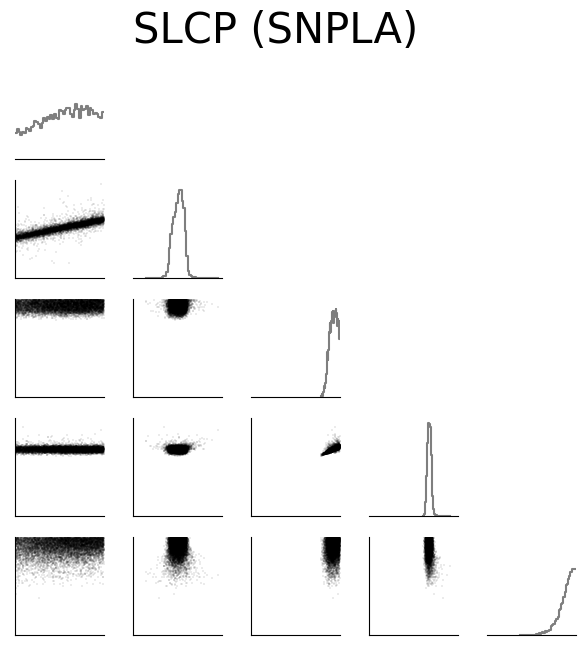

In [80]:
fig = pairplot_sns(rKL_samples, height=1.3, limits=(-3,3))
fig.suptitle("SLCP (SNPLA)", fontsize=30, y=1.05)
fig.axes[-5].get_shared_y_axes().remove(fig.axes[-1])
fig.axes[-5].get_shared_y_axes().remove(fig.axes[-2])
fig.axes[-5].get_shared_y_axes().remove(fig.axes[-3])
fig.axes[-5].get_shared_y_axes().remove(fig.axes[-4])
fig.axes[-4].get_shared_y_axes().remove(fig.axes[-1])
fig.axes[-4].get_shared_y_axes().remove(fig.axes[-2])
fig.axes[-4].get_shared_y_axes().remove(fig.axes[-3])
fig.axes[-3].get_shared_y_axes().remove(fig.axes[-1])
fig.axes[-3].get_shared_y_axes().remove(fig.axes[-2])
fig.axes[-2].get_shared_y_axes().remove(fig.axes[-1])
for ax in fig.axes:
    ax.set_yticks([])
    ax.set_xticks([])
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    ax.set_ylabel("")
    ax.set_xlabel("")
fig.axes[-5].set_ylim(0,.4)
fig.axes[-4].set_ylim(0,1.2)
fig.axes[-3].set_ylim(0,1.5)
fig.axes[-2].set_ylim(0,3.)
fig.axes[-1].set_ylim(0,1.5)
fig.savefig("slcp_samples_rKL.svg", rasterized=True)

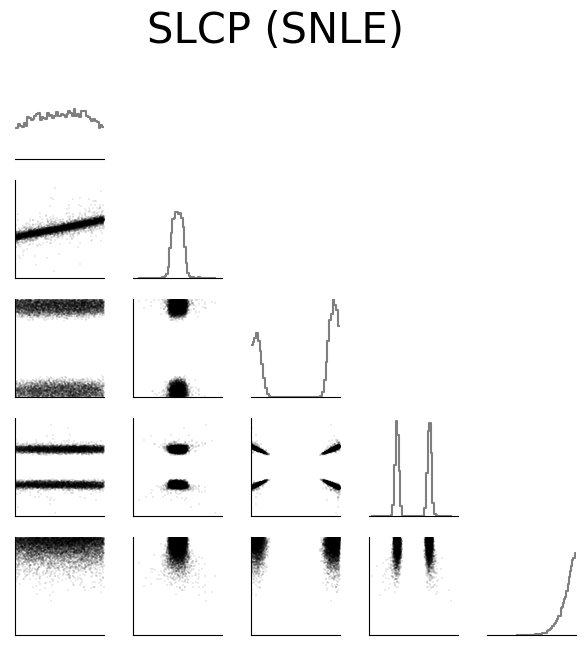

In [81]:
fig = pairplot_sns(MCMC_samples_multichain, height=1.3, limits=(-3,3))
fig.suptitle("SLCP (SNLE)", fontsize=30, y=1.05)
fig.axes[-5].get_shared_y_axes().remove(fig.axes[-1])
fig.axes[-5].get_shared_y_axes().remove(fig.axes[-2])
fig.axes[-5].get_shared_y_axes().remove(fig.axes[-3])
fig.axes[-5].get_shared_y_axes().remove(fig.axes[-4])
fig.axes[-4].get_shared_y_axes().remove(fig.axes[-1])
fig.axes[-4].get_shared_y_axes().remove(fig.axes[-2])
fig.axes[-4].get_shared_y_axes().remove(fig.axes[-3])
fig.axes[-3].get_shared_y_axes().remove(fig.axes[-1])
fig.axes[-3].get_shared_y_axes().remove(fig.axes[-2])
fig.axes[-2].get_shared_y_axes().remove(fig.axes[-1])
for ax in fig.axes:
    ax.set_yticks([])
    ax.set_xticks([])
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    ax.set_ylabel("")
    ax.set_xlabel("")
fig.axes[-5].set_ylim(0,.4)
fig.axes[-4].set_ylim(0,1.5)
fig.axes[-3].set_ylim(0,0.8)
fig.axes[-2].set_ylim(0,1.5)
fig.axes[-1].set_ylim(0,1.5)
fig.savefig("slcp_samples_MCMC.svg", rasterized=True)

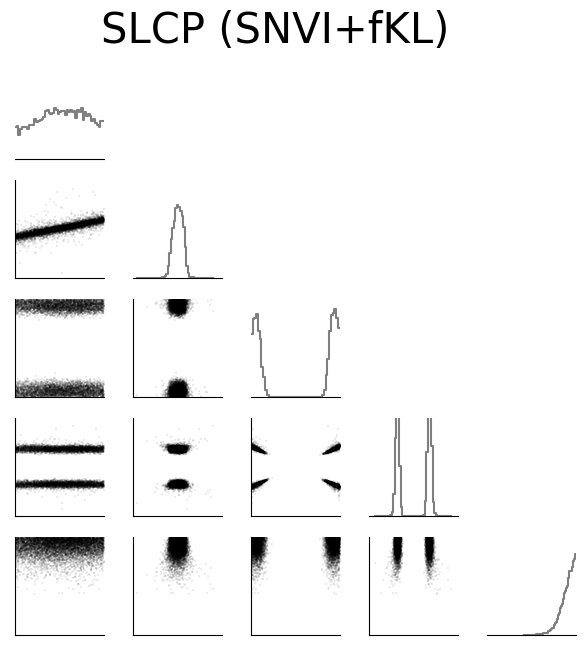

In [85]:
fig = pairplot_sns(fKL_samples, height=1.3, limits=(-3,3))
fig.suptitle("SLCP (SNVI+fKL)", fontsize=30, y=1.05)
fig.axes[-5].get_shared_y_axes().remove(fig.axes[-1])
fig.axes[-5].get_shared_y_axes().remove(fig.axes[-2])
fig.axes[-5].get_shared_y_axes().remove(fig.axes[-3])
fig.axes[-5].get_shared_y_axes().remove(fig.axes[-4])
fig.axes[-4].get_shared_y_axes().remove(fig.axes[-1])
fig.axes[-4].get_shared_y_axes().remove(fig.axes[-2])
fig.axes[-4].get_shared_y_axes().remove(fig.axes[-3])
fig.axes[-3].get_shared_y_axes().remove(fig.axes[-1])
fig.axes[-3].get_shared_y_axes().remove(fig.axes[-2])
fig.axes[-2].get_shared_y_axes().remove(fig.axes[-1])
for ax in fig.axes:
    ax.set_yticks([])
    ax.set_xticks([])
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    ax.set_ylabel("")
    ax.set_xlabel("")
    
fig.axes[-5].set_ylim(0,.4)
fig.axes[-4].set_ylim(0,1.5)
fig.axes[-3].set_ylim(0,0.8)
fig.axes[-2].set_ylim(0,1.2)
fig.axes[-1].set_ylim(0,1.5)
fig.savefig("slcp_samples_fKL.svg", rasterized=True)

In [10]:
df = get_full_dataset("main_benchmark")
fKL_id = df.query("task=='lotka_volterra'").query("algorithm=='SNLVI'").query("num_simulations==100000").query("num_observation==1").query("loss=='forward_kl'")["folder"].tolist()[-1]
rKL_id = df.query("task=='lotka_volterra'").query("algorithm=='SNLVI'").query("num_simulations==100000").query("num_observation==1").query("loss=='elbo'")["folder"].tolist()[-1]
alpha_id = df.query("task=='lotka_volterra'").query("algorithm=='SNLVI'").query("num_simulations==100000").query("num_observation==1").query("loss=='renjey_divergence'")["folder"].tolist()[-1]
MCMC_ids = df.query("task=='lotka_volterra'").query("algorithm=='SNLMCMC'").query("num_simulations==100000").query("num_observation==1").query("loss=='na'")["folder"].tolist()
fKL_samples = get_samples_by_id("main_benchmark", fKL_id)
rKL_samples = get_samples_by_id("main_benchmark", rKL_id)
MCMC_samples = get_samples_by_id("main_benchmark", MCMC_ids[-1])
MCMC_samples_multichain = get_samples_by_id("main_benchmark", MCMC_ids[0])

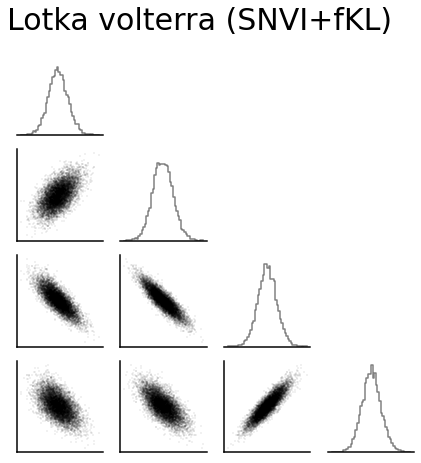

In [11]:
fig = pairplot_sns(fKL_samples, height=1.6)
fig.suptitle("Lotka volterra (SNVI+fKL)", fontsize=30, y=1.05)
fig.axes[-4].get_shared_y_axes().remove(fig.axes[-1])
fig.axes[-4].get_shared_y_axes().remove(fig.axes[-2])
fig.axes[-4].get_shared_y_axes().remove(fig.axes[-3])
fig.axes[-3].get_shared_y_axes().remove(fig.axes[-1])
fig.axes[-3].get_shared_y_axes().remove(fig.axes[-2])
fig.axes[-2].get_shared_y_axes().remove(fig.axes[-1])
for ax in fig.axes:
    ax.set_yticks([])
    ax.set_xticks([])
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    ax.set_ylabel("")
    ax.set_xlabel("")
fig.axes[-4].set_ylim(0,60)
fig.axes[-3].set_ylim(0,65)
fig.axes[-2].set_ylim(0,25)
fig.axes[-1].set_ylim(0,200)
fig.savefig("lotka_volterra_samples_fKL.svg")

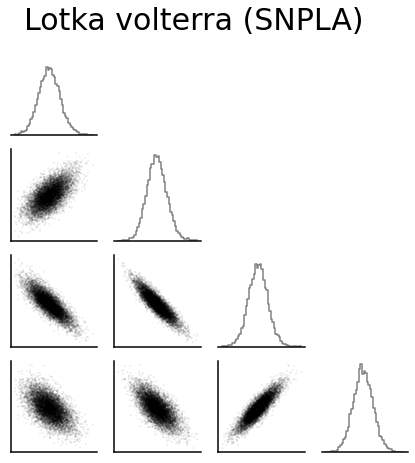

In [12]:
fig = pairplot_sns(rKL_samples, height=1.6)
fig.suptitle("Lotka volterra (SNPLA)", fontsize=30,y= 1.05)
fig.axes[-4].get_shared_y_axes().remove(fig.axes[-1])
fig.axes[-4].get_shared_y_axes().remove(fig.axes[-2])
fig.axes[-4].get_shared_y_axes().remove(fig.axes[-3])
fig.axes[-3].get_shared_y_axes().remove(fig.axes[-1])
fig.axes[-3].get_shared_y_axes().remove(fig.axes[-2])
fig.axes[-2].get_shared_y_axes().remove(fig.axes[-1])
for ax in fig.axes:
    ax.set_yticks([])
    ax.set_xticks([])
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    ax.set_ylabel("")
    ax.set_xlabel("")
fig.axes[-4].set_ylim(0,60)
fig.axes[-3].set_ylim(0,65)
fig.axes[-2].set_ylim(0,25)
fig.axes[-1].set_ylim(0,200)
fig.savefig("lotka_volterra_samples_rKL.svg")

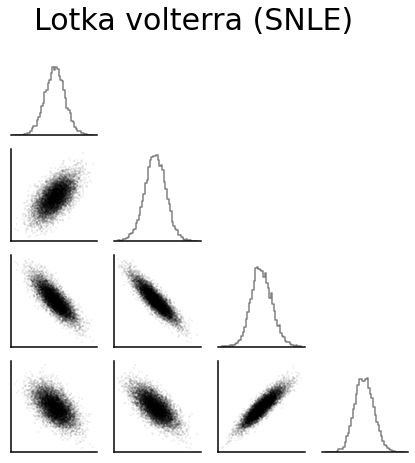

In [13]:
fig = pairplot_sns(MCMC_samples, height=1.6)
fig.suptitle("Lotka volterra (SNLE)", fontsize=30, y=1.05)
fig.axes[-4].get_shared_y_axes().remove(fig.axes[-1])
fig.axes[-4].get_shared_y_axes().remove(fig.axes[-2])
fig.axes[-4].get_shared_y_axes().remove(fig.axes[-3])
fig.axes[-3].get_shared_y_axes().remove(fig.axes[-1])
fig.axes[-3].get_shared_y_axes().remove(fig.axes[-2])
fig.axes[-2].get_shared_y_axes().remove(fig.axes[-1])
for ax in fig.axes:
    ax.set_yticks([])
    ax.set_xticks([])
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    ax.set_ylabel("")
    ax.set_xlabel("")
fig.axes[-4].set_ylim(0,60)
fig.axes[-3].set_ylim(0,65)
fig.axes[-2].set_ylim(0,25)
fig.axes[-1].set_ylim(0,200)
fig.savefig("lotka_volterra_samples_MCMC.svg")

In [5]:
df = get_full_dataset("main_benchmark")
fKL_id = df.query("task=='bernoulli_glm'").query("algorithm=='SNLVI'").query("num_simulations==100000").query("num_observation==1").query("loss=='forward_kl'")["folder"].tolist()[-1]
rKL_id = df.query("task=='bernoulli_glm'").query("algorithm=='SNLVI'").query("num_simulations==100000").query("num_observation==1").query("loss=='elbo'")["folder"].tolist()[-1]
alpha_id = df.query("task=='bernoulli_glm'").query("algorithm=='SNLVI'").query("num_simulations==100000").query("num_observation==1").query("loss=='renjey_divergence'")["folder"].tolist()[-1]
MCMC_ids = df.query("task=='bernoulli_glm'").query("algorithm=='SNLMCMC'").query("num_simulations==100000").query("num_observation==1").query("loss=='na'")["folder"].tolist()
fKL_samples = get_samples_by_id("main_benchmark", fKL_id)
rKL_samples = get_samples_by_id("main_benchmark", rKL_id)
MCMC_samples = get_samples_by_id("main_benchmark", MCMC_ids[-1])
MCMC_samples_multichain = get_samples_by_id("main_benchmark", MCMC_ids[0])

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'serif' not found because none of the following families were found: Arial, sans-serif


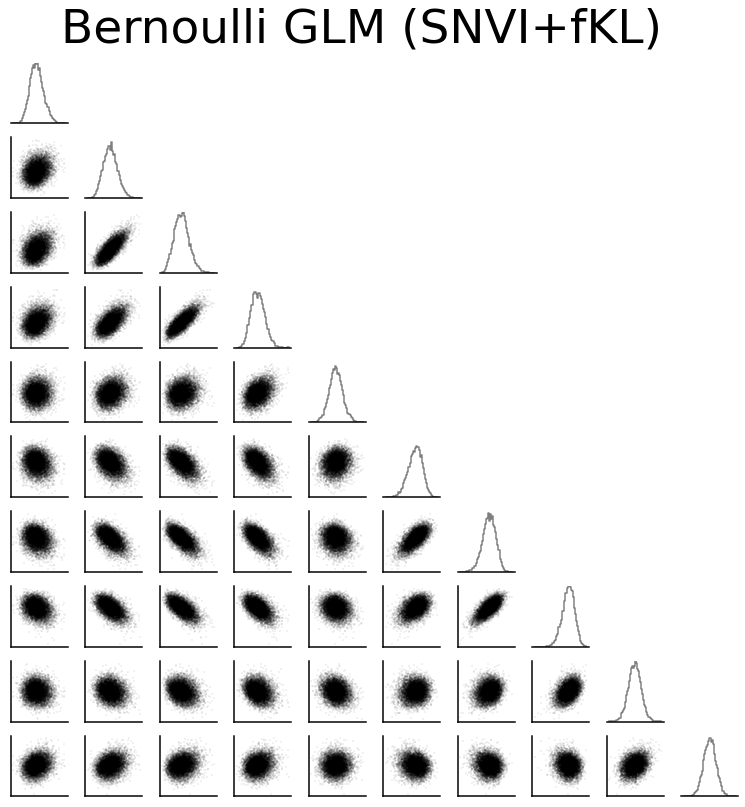

In [6]:
fig = pairplot_sns(fKL_samples, height=1.1)
fig.suptitle("Bernoulli GLM (SNVI+fKL)", fontsize=47, y=1.05)
fig.axes[-10].get_shared_y_axes().remove(fig.axes[-1])
fig.axes[-10].get_shared_y_axes().remove(fig.axes[-2])
fig.axes[-10].get_shared_y_axes().remove(fig.axes[-3])
fig.axes[-10].get_shared_y_axes().remove(fig.axes[-4])
fig.axes[-10].get_shared_y_axes().remove(fig.axes[-5])
fig.axes[-10].get_shared_y_axes().remove(fig.axes[-6])
fig.axes[-10].get_shared_y_axes().remove(fig.axes[-7])
fig.axes[-10].get_shared_y_axes().remove(fig.axes[-8])
fig.axes[-10].get_shared_y_axes().remove(fig.axes[-9])
fig.axes[-10].set_ylim(0,1)
fig.axes[-9].set_ylim(0,1.)
fig.axes[-8].set_ylim(0,0.6)
fig.axes[-7].set_ylim(0,0.8)
fig.axes[-6].set_ylim(0,1.4)
fig.axes[-5].set_ylim(0,1.2)
fig.axes[-4].set_ylim(0,0.8)
fig.axes[-3].set_ylim(0,0.9)
fig.axes[-2].set_ylim(0,1.2)
fig.axes[-1].set_ylim(0,1.1)
for ax in fig.axes:
    ax.set_yticks([])
    ax.set_xticks([])
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    ax.set_ylabel("")
    ax.set_xlabel("")
fig.savefig("bernoulli_glm_samples_fKL.svg")

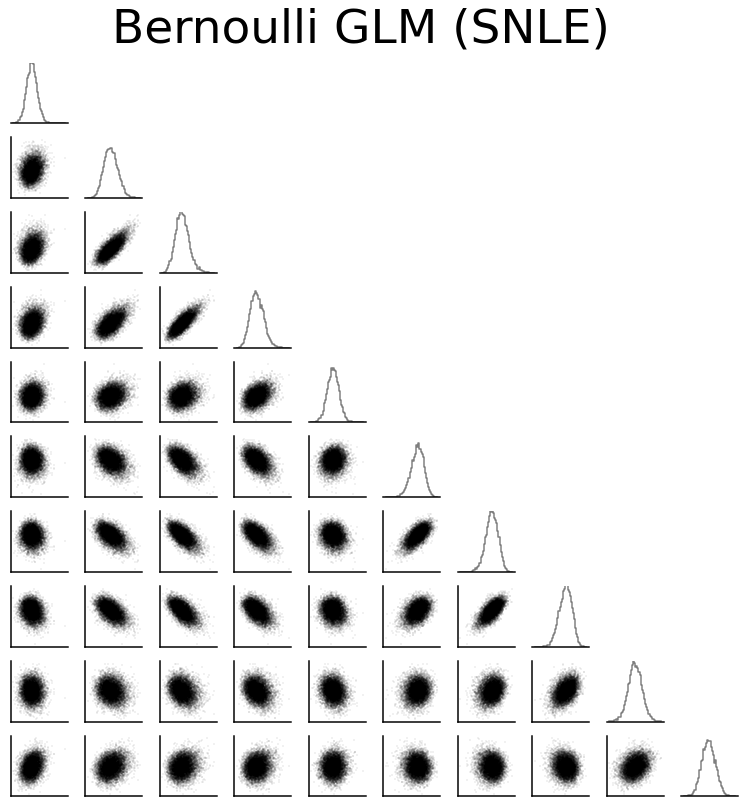

In [7]:
fig = pairplot_sns(MCMC_samples, height=1.1)
fig.suptitle("Bernoulli GLM (SNLE)", fontsize=47, y=1.05)
fig.axes[-10].get_shared_y_axes().remove(fig.axes[-1])
fig.axes[-10].get_shared_y_axes().remove(fig.axes[-2])
fig.axes[-10].get_shared_y_axes().remove(fig.axes[-3])
fig.axes[-10].get_shared_y_axes().remove(fig.axes[-4])
fig.axes[-10].get_shared_y_axes().remove(fig.axes[-5])
fig.axes[-10].get_shared_y_axes().remove(fig.axes[-6])
fig.axes[-10].get_shared_y_axes().remove(fig.axes[-7])
fig.axes[-10].get_shared_y_axes().remove(fig.axes[-8])
fig.axes[-10].get_shared_y_axes().remove(fig.axes[-9])
for ax in fig.axes:
    ax.set_yticks([])
    ax.set_xticks([])
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    ax.set_ylabel("")
    ax.set_xlabel("")
fig.axes[-10].set_ylim(0,1)
fig.axes[-9].set_ylim(0,1.)
fig.axes[-8].set_ylim(0,0.6)
fig.axes[-7].set_ylim(0,0.8)
fig.axes[-6].set_ylim(0,1.4)
fig.axes[-5].set_ylim(0,1.2)
fig.axes[-4].set_ylim(0,0.8)
fig.axes[-3].set_ylim(0,0.9)
fig.axes[-2].set_ylim(0,1.2)
fig.axes[-1].set_ylim(0,1.1)
fig.savefig("bernoulli_glm_samples_MCMC.svg")

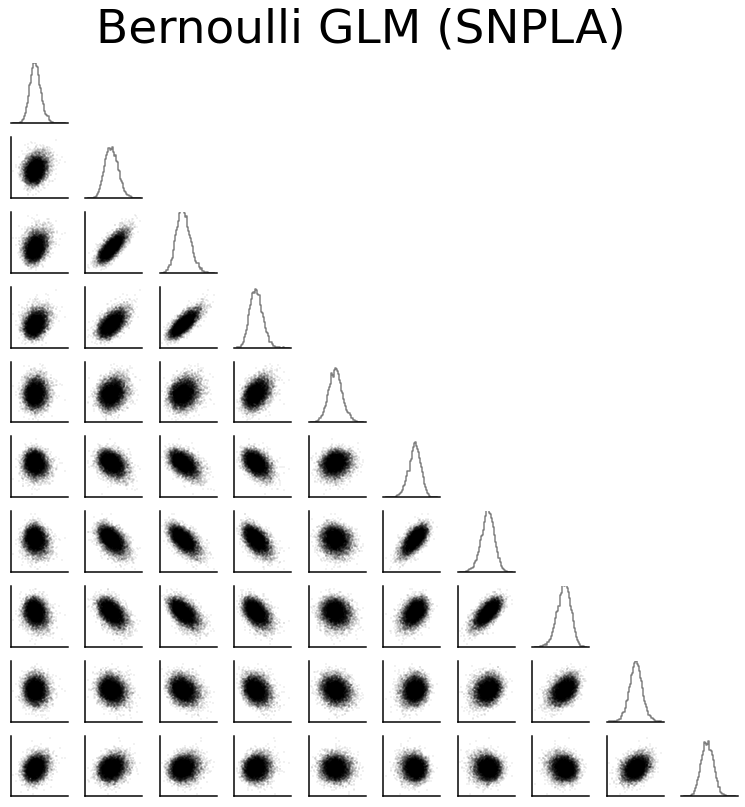

In [8]:
fig = pairplot_sns(rKL_samples, height=1.1)
fig.suptitle("Bernoulli GLM (SNPLA)", fontsize=47, y=1.05)
fig.axes[-10].get_shared_y_axes().remove(fig.axes[-1])
fig.axes[-10].get_shared_y_axes().remove(fig.axes[-2])
fig.axes[-10].get_shared_y_axes().remove(fig.axes[-3])
fig.axes[-10].get_shared_y_axes().remove(fig.axes[-4])
fig.axes[-10].get_shared_y_axes().remove(fig.axes[-5])
fig.axes[-10].get_shared_y_axes().remove(fig.axes[-6])
fig.axes[-10].get_shared_y_axes().remove(fig.axes[-7])
fig.axes[-10].get_shared_y_axes().remove(fig.axes[-8])
fig.axes[-10].get_shared_y_axes().remove(fig.axes[-9])
for ax in fig.axes:
    ax.set_yticks([])
    ax.set_xticks([])
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    ax.set_ylabel("")
    ax.set_xlabel("")
fig.axes[-10].set_ylim(0,1)
fig.axes[-9].set_ylim(0,1.)
fig.axes[-8].set_ylim(0,0.6)
fig.axes[-7].set_ylim(0,0.8)
fig.axes[-6].set_ylim(0,1.4)
fig.axes[-5].set_ylim(0,1.2)
fig.axes[-4].set_ylim(0,0.8)
fig.axes[-3].set_ylim(0,0.9)
fig.axes[-2].set_ylim(0,1.2)
fig.axes[-1].set_ylim(0,1.1)
fig.savefig("bernoulli_glm_samples_rKL.svg")

In [14]:
import svgutils.transform as sg
import sys 

#create new SVG figure
fig = sg.SVGFigure("16cm", "12cm")

# load matpotlib-generated figures
fig1 = sg.fromfile('slcp_samples_MCMC.svg')
fig2 = sg.fromfile('slcp_samples_fKL.svg')
fig3 = sg.fromfile('slcp_samples_rKL.svg')

fig4 = sg.fromfile('lotka_volterra_samples_MCMC.svg')
fig5 = sg.fromfile('lotka_volterra_samples_fKL.svg')
fig6 = sg.fromfile('lotka_volterra_samples_rKL.svg')

fig7 = sg.fromfile('bernoulli_glm_samples_MCMC.svg')
fig8 = sg.fromfile('bernoulli_glm_samples_fKL.svg')
fig9 = sg.fromfile('bernoulli_glm_samples_rKL.svg')

# get the plot objects

plot1 = fig1.getroot()
plot1.moveto(10,320, scale_x=0.3, scale_y=0.3)
plot2 = fig3.getroot()
plot2.moveto(180,320, scale_x=0.3, scale_y=0.3)
plot3 = fig2.getroot()
plot3.moveto(350,320, scale_x=0.3, scale_y=0.3)

plot4 = fig4.getroot()
plot4.moveto(10,165, scale_x=0.3, scale_y=0.3)
plot5 = fig6.getroot()
plot5.moveto(180,165, scale_x=0.3, scale_y=0.3)
plot6 = fig5.getroot()
plot6.moveto(350,165, scale_x=0.3, scale_y=0.3)

plot7 = fig7.getroot()
plot7.moveto(10,0, scale_x=0.18, scale_y=0.18)
plot8 = fig9.getroot()
plot8.moveto(180,0, scale_x=0.18, scale_y=0.18)
plot9 = fig8.getroot()
plot9.moveto(350,0, scale_x=0.18, scale_y=0.18)

# add text labels
#txt1 = sg.TextElement(25,20, "A", size=18, weight="bold")
# txt2 = sg.TextElement(515,20, "B", size=18, weight="bold")
# txt3 = sg.TextElement(25,265, "C", size=18, weight="bold")
# txt4 = sg.TextElement(515,265, "D", size=18, weight="bold")

# append plots and labels to figure
fig.append([plot1, plot2, plot3, plot4, plot5, plot6, plot7, plot8, plot9])
#fig.append([txt1])

# save generated SVG files
fig.save("APPENDIX_slcp_samples.svg")